0.0


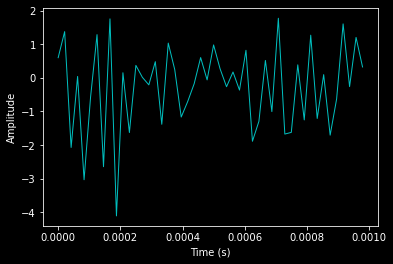

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import time


t1 = time.time()

plt.style.use('dark_background')
dt = 1/48000
t = np.arange(0,0.001,dt)
fsum = np.sin(2 * np.pi * 20000 * t) 
fsumNoise =  fsum + 1*np.random.randn(len(t)) 
t2 = time.time()


plt.plot(t, fsumNoise, color = 'c', linewidth = 1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')





print(t2-t1)



0.0


C:\Users\rowan\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


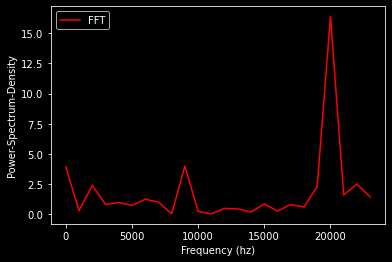

In [57]:
t1 = time.time()

n = len(t)
fhat = np.fft.fft(fsumNoise)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
xaxis = np.arange(0,np.floor(n/2), dtype = 'int')

t2 = time.time()
print(t2-t1)

plt.plot(freq[xaxis], PSD[xaxis], color = 'r', linewidth = 1.5, label = "FFT")
plt.xlabel('Frequency (hz)')
plt.ylabel('Power-Spectrum-Density')
plt.legend()

In [24]:
t1 = time.time()

fraw = []
for i in range(len(xaxis)):
    if PSD[i] > 4:
        value = freq[i]
        fraw.append(value)
fraw

t2 = time.time()
print(t2-t1)

        

0.0


In [1]:
import matplotlib.pyplot as plot

from scipy.io import wavfile

 

# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('E:\Documents\GitHub\Team13\testin.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with piano music')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

OSError: [Errno 22] Invalid argument: 'E:\\Documents\\GitHub\\Team13\testin.wav'